<p>
<font size='5' face='Georgia, Arial'>Tutoría IIC2233 - Repaso Examen (1/2)</font><br>
<font size='1'>Juan José Sánchez Medina</font>
</p>

# Threading

## 1. 

<div style="text-align: center">
  <img src="Resources/image.png" width="70%" alt="image.png"/>
</div>

In [2]:
import threading


def thread_A(evento, lock):
    evento.wait()
    lock.acquire()
    print("A")


def thread_B(lock):
    lock.acquire()
    print("B")


def thread_C(evento, lock):
    evento.set()
    print("C")
    lock.release()

evento = threading.Event()
lock = threading.Lock()

thread_a = threading.Thread(target=thread_A, args=(evento, lock))
thread_b = threading.Thread(target=thread_B, args=(lock, ))
thread_c = threading.Thread(target=thread_C, args=(evento, lock))

thread_a.start()
thread_b.start()
thread_b.join()
thread_c.start()

B
C
A


Recordar que hace `threading.Event()`, `threading.Lock()` y `threading.Thread()`

- `threading.Event()`: Sirve como un semáforo donde al usar `.set` desbloqueamos los hilos que antes estaban en `.wait`. Para reiniciar el semáforo usamos `.clear`.
- `threading.Lock()`: Es una restricción que permite que solo un hilo acceda a una sección crítica. Usa:
    - `.acquire()`: Adquiere el lock
    - `.release()`: Libera el lock
    - Con un _ContextManager_, es decir `with lock:` se realiza el `.acquire()` y `.release()` automáticamente
    - Para consultar su estado se usa `.locked() -> bool`.
- `threading.Thread()`: Es un hilo que se ejecuta de forma **concurrente**, tiene los parámetros `target` y `args` (`args` siempre es una tupla). Usa:
    - `.start()`: Inicia el hilo
    - `.join()`: Espera a que el hilo termine


## 2. 
Respecto a concurrencia y paralelismo, ¿cuál de las siguientes afirmaciones es correcta?

A) La concurrencia implica siempre que varias tareas se ejecutan exactamente al mismo tiempo.


B) El paralelismo se puede lograr con hilos (threads) en Python para tareas intensivas en CPU.


C) La concurrencia permite que múltiples tareas progresen intercalando su ejecución, aunque no se ejecuten simultáneamente.


D) El multiprocesamiento no permite paralelismo real porque los procesos comparten la misma memoria.


<details>
  <summary>Respuesta</summary>
  C
</details>

<div class="alert alert-block alert-info">
  <b>Info:</b> Recordar la diferencia entre multiprocesamiento, paralelismo y concurrencia.
</div>

| Concepto            | Analogía                                                                | Definición                                                                                     |
|---------------------|--------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **Concurrencia**    | Un solo cocinero que trabaja en varios platos, cambiando rápidamente entre tareas.  | Varias tareas progresan en el tiempo, alternando su ejecución. No implica simultaneidad real.  |
| **Paralelismo**     | Varios cocineros trabajando al mismo tiempo en platos distintos | Varias tareas se ejecutan realmente **al mismo tiempo**, usando múltiples núcleos de CPU.       |
| **Multiprocesamiento** | Tres cocineros en **cocinas independientes**, cada uno con sus propios ingredientes. | Uso de múltiples procesos independientes, cada uno con su propia memoria, permitiendo paralelismo real. |

<br>
<details>
<summary>Comparación</summary>
<div style="text-align: center">
  <img src="https://i.redd.it/f5frm3em73ce1.gif" width="500" alt="filename.jpg"/>
</div>
</details>


## 3.

<div style="text-align: center">
  <img src="Resources/image-2.png" width="70%" alt="image-2.png"/>
</div>

<details>
  <summary>Respuesta</summary>
  A
</details>

Recordar que:

In [3]:
import threading

class CustomThread(threading.Thread):
    def run(self):
        print("Hola desde el thread")

t = CustomThread()
t.start()


Hola desde el thread


# 3.

<div style="text-align: center">
  <img src="Resources/image-3.png" width="70%" alt="image-3"/>
</div>

<div style="text-align: center">
  <img src="Resources/image-4.png" width="70%" alt="image-4"/>
</div>

In [7]:
import threading
from time import sleep

lock_a = threading.Lock()
lock_b = threading.Lock()

def thread1():
    with lock_a:
        print("Thread 1: Adquiere lock_a")
        # Simula alguna operación
        sleep(5)
        print("Thread 1: Intentando adquirir lock_b")
        with lock_b:
            print("Thread 1: Adquiere lock_b")


def thread2():
    with lock_b:
        print("Thread 2: Adquiere lock_b")
        # Simula alguna operación
        sleep(5)
        print("Thread 2: Intentando adquirir lock_a")
        with lock_a:
            print("Thread 2: Adquiere lock_a")


t1 = threading.Thread(target=thread1)
t2 = threading.Thread(target=thread2)

t1.start()
t2.start()
t1.join()
t2.join()

Thread 1: Adquiere lock_a
Thread 2: Adquiere lock_b
Thread 1: Intentando adquirir lock_bThread 2: Intentando adquirir lock_a



KeyboardInterrupt: 

In [6]:
import threading
from time import sleep

lock_a = threading.Lock()
lock_b = threading.Lock()

def thread1():
    with lock_a:
        print("Thread 1: Adquiere lock_a")
        # Simula alguna operación
        sleep(5)
        print("Thread 1: Intentando adquirir lock_b")
    with lock_b:
        print("Thread 1: Adquiere lock_b")


def thread2():
    with lock_b:
        print("Thread 2: Adquiere lock_b")
        # Simula alguna operación
        sleep(5)
        print("Thread 2: Intentando adquirir lock_a")
    with lock_a:
        print("Thread 2: Adquiere lock_a")


t1 = threading.Thread(target=thread1)
t2 = threading.Thread(target=thread2)

t1.start()
t2.start()
t1.join()
t2.join()

Thread 1: Adquiere lock_a
Thread 2: Adquiere lock_b
Thread 1: Intentando adquirir lock_bThread 2: Intentando adquirir lock_a

Thread 1: Adquiere lock_b
Thread 2: Adquiere lock_a


# Networks

## 1. 


<div style="text-align: center">
  <img src="Resources/image-5.png" width="70%" alt="image-5.png"/>
</div>

<details>
  <summary>Respuesta</summary>
  A
</details>

## 2. `send` y `sendall()`

Respecto a los métodos send() y sendall() en un socket TCP en Python, ¿cuál de las siguientes afirmaciones es correcta?


A) send() siempre envía todos los bytes del mensaje, mientras que sendall() envía solo una parte.


B) sendall() garantiza enviar todos los bytes del mensaje, mientras que send() podría enviar solo una parte del mensaje.


C) Ambos métodos envían siempre el mensaje completo, por lo que su uso es equivalente.


D) send() bloquea la ejecución hasta que el servidor responda con un recv().


E) sendall() solo puede usarse en sockets no bloqueantes.


<details>
  <summary>Respuesta</summary>
  B
</details>


# 3

<div style="text-align: center">
  <img src="Resources/image-6.png" width="70%" alt="image-6"/>
</div>

<details>
  <summary>Respuesta</summary>
  C
</details>

In [ ]:
import json

class JugadorEncoder(json.JSONEncoder):
    def default(self, o):
        o = o.__dict__
        return {o['nombre']: {'puntaje': o['puntaje'], 'vida': o['vida'], 'nivel': o['nivel']}}

class JugadorDecoder(json.JSONDecoder):
    def default(self, o):
        o = o.__dict__
        return Jugador(o['nombre'], o['puntaje'])

class Jugador:
    def __init__(self, nombre, puntaje):
        self.nombre = nombre
        self.puntaje = puntaje
        self.vida = 100
        self.vida2()

    def vida2(self):
        self.nivel = 2


mario = Jugador("Mario", 1500)

json_jugador = json.dumps(mario.__dict__, cls=JugadorEncoder)
print(json_jugador)

json_jugador_2 = json.loads(json_jugador, cls=JugadorDecoder)
print(type(json_jugador_2))

# 4

<div style="text-align: center">
  <img src="Resources/image-7.png" width="70%" alt="image-7.png"/>
</div>

<details>
  <summary>Respuesta</summary>
  B
</details>

In [9]:
# ...

# A)
bytes_ejemplo: bytes = b"Hola" 
bytes_ejemplo[1] = b"c"

bytes_arr: bytearray = bytearray(b"Hola")
bytes_arr[1] = b"c"

print(bytes_ejemplo)


TypeError: 'bytes' object does not support item assignment

In [18]:
# ...

# D)
print(bytearray(b"\x00\x01"))
print(bytearray(b"\x01"))

# En binario:
print(' '.join(f'{b:08b}' for b in bytearray(b"\x00\x01")))
print(' '.join(f'{b:08b}' for b in bytearray(b"\x01")))


bytearray(b'\x00\x01')
bytearray(b'\x01')
00000000 00000001
00000001


# 5

<div style="text-align: center">
  <img src="Resources/image-8.png" width="50%" alt="image-8.png"/>
</div>

<details>
  <summary>Respuesta</summary>
  C
</details>

# `PyQt5` - Interfaces Gráficas

## 1

<div style="text-align: center">
  <img src="Resources/image-9.png" width="70%" alt="image-9.png"/>
</div>

<details>
  <summary>Respuesta</summary>
  C
</details>

## 2

<div style="text-align: center">
  <img src="Resources/image-10.png" width="50%" alt="image-10.png"/>
</div>

<details>
  <summary>Respuesta</summary>
  C
</details>

## 3

<div style="text-align: center">
  <img src="Resources/image-11.png" width="70%" alt="image-11.png"/>
</div>

<details>
  <summary>Respuesta</summary>
  A
</details>

In [31]:
import pandas as pd

data = [[0,1,1,0], [1,0,0,1], [1,0,0,0], [0,1,0,0]]

df = pd.DataFrame(data)
df.columns = ['A', 'B', 'C', 'D']
df.index = ['A', 'B', 'C', 'D']

df


,A,B,C,D
A,0,1,1,0
B,1,0,0,1
C,1,0,0,0
D,0,1,0,0


In [32]:
df.loc["D", "B"]

np.int64(1)

In [38]:
df.iloc[1,3]

np.int64(1)

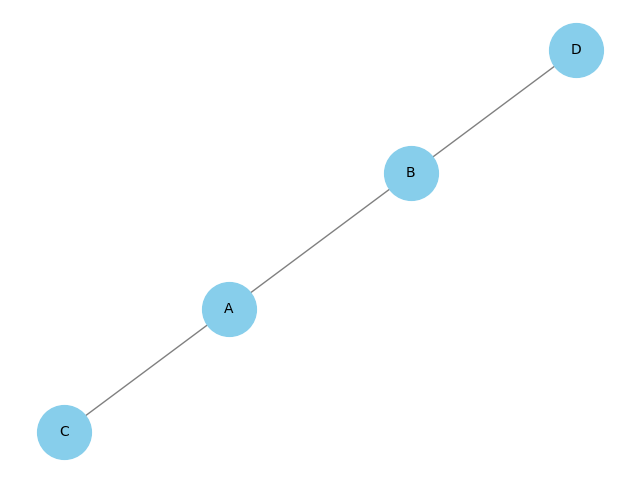

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_adjacency(df)
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray', linewidths=1, font_size=10)
plt.axis('off')
plt.show()


# General

## 1.

<div style="text-align: center">
  <img src="Resources/image-12.png" width="60%" alt="image-12.png"/>
</div>

<details>
  <summary>Respuesta</summary>
  E
</details>

## 2.

<div style="text-align: center">
  <img src="Resources/image-13.png" width="70%" alt="image-13.png"/>
</div>

In [16]:
def foo(*args, **kwargs):
    print(kwargs)

datos = {'primero': 123, 'segundo': 53}

foo(datos)
foo(*datos)
foo(datos, *datos)
foo(**datos)

{}
{}
{}
{'primero': 123, 'segundo': 53}


# RegEx

## 1.

<div style="text-align: center">
  <img src="Resources/image-14.png" width="70%" alt="image-14.png"/>
</div>

<details>
  <summary>Respuesta</summary>
  C
</details>

In [22]:
import re

frase = '¡Aaahhh! La cama de mi casa está ocupada por mi gata'

matches = re.findall(r'a(s|m)*a', frase)
count = len(matches)
print(count)



3


# APIs

## 1.

<div style="text-align: center">
  <img src="Resources/image-15.png" width="70%" alt="image-15.png"/>
</div>